In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])


In [3]:
basepath = Path("/scratch/crobin/earthnet2023_interpolated/")
# test_paths = list(basepath.glob("train/*/*.nc"))
test_paths = list(basepath.glob("test/*/*.nc")) #list(basepath.glob("test/*/*.nc"))
#print("len train set: ", len(test_original_paths))
print("len test set: ", len(test_paths))

len test set:  100


In [6]:
print(test_paths[0])

/scratch/crobin/earthnet2023_interpolated/test/Algeria/31SDV3940.nc


In [26]:
minicube_test = xr.open_dataset(test_paths[5])
#minicube_original = xr.open_dataset(test_original_paths[0]).load()

In [21]:
file = "/scratch/crobin/earthnet2023/test/Algeria/31SDV3940.nc" #"/scratch/crobin/earthnet2023_interpolated/test/Algeria/31SDV3940.nc"
minicube = xr.open_dataset(test_paths[0])
print(len(minicube_test.time.dt.date.values))

450


In [14]:
pred_path = test_paths[0]
print(pred_path)
name = str(pred_path)[-33:]
test_path = list(Path("/scratch/crobin/earthnet2021x/").glob("iid_chopped/*/" + name))[0]
print(test_path)


/scratch/crobin/earthnet2023_interpolated/test/Algeria/31SDV3940.nc


IndexError: list index out of range

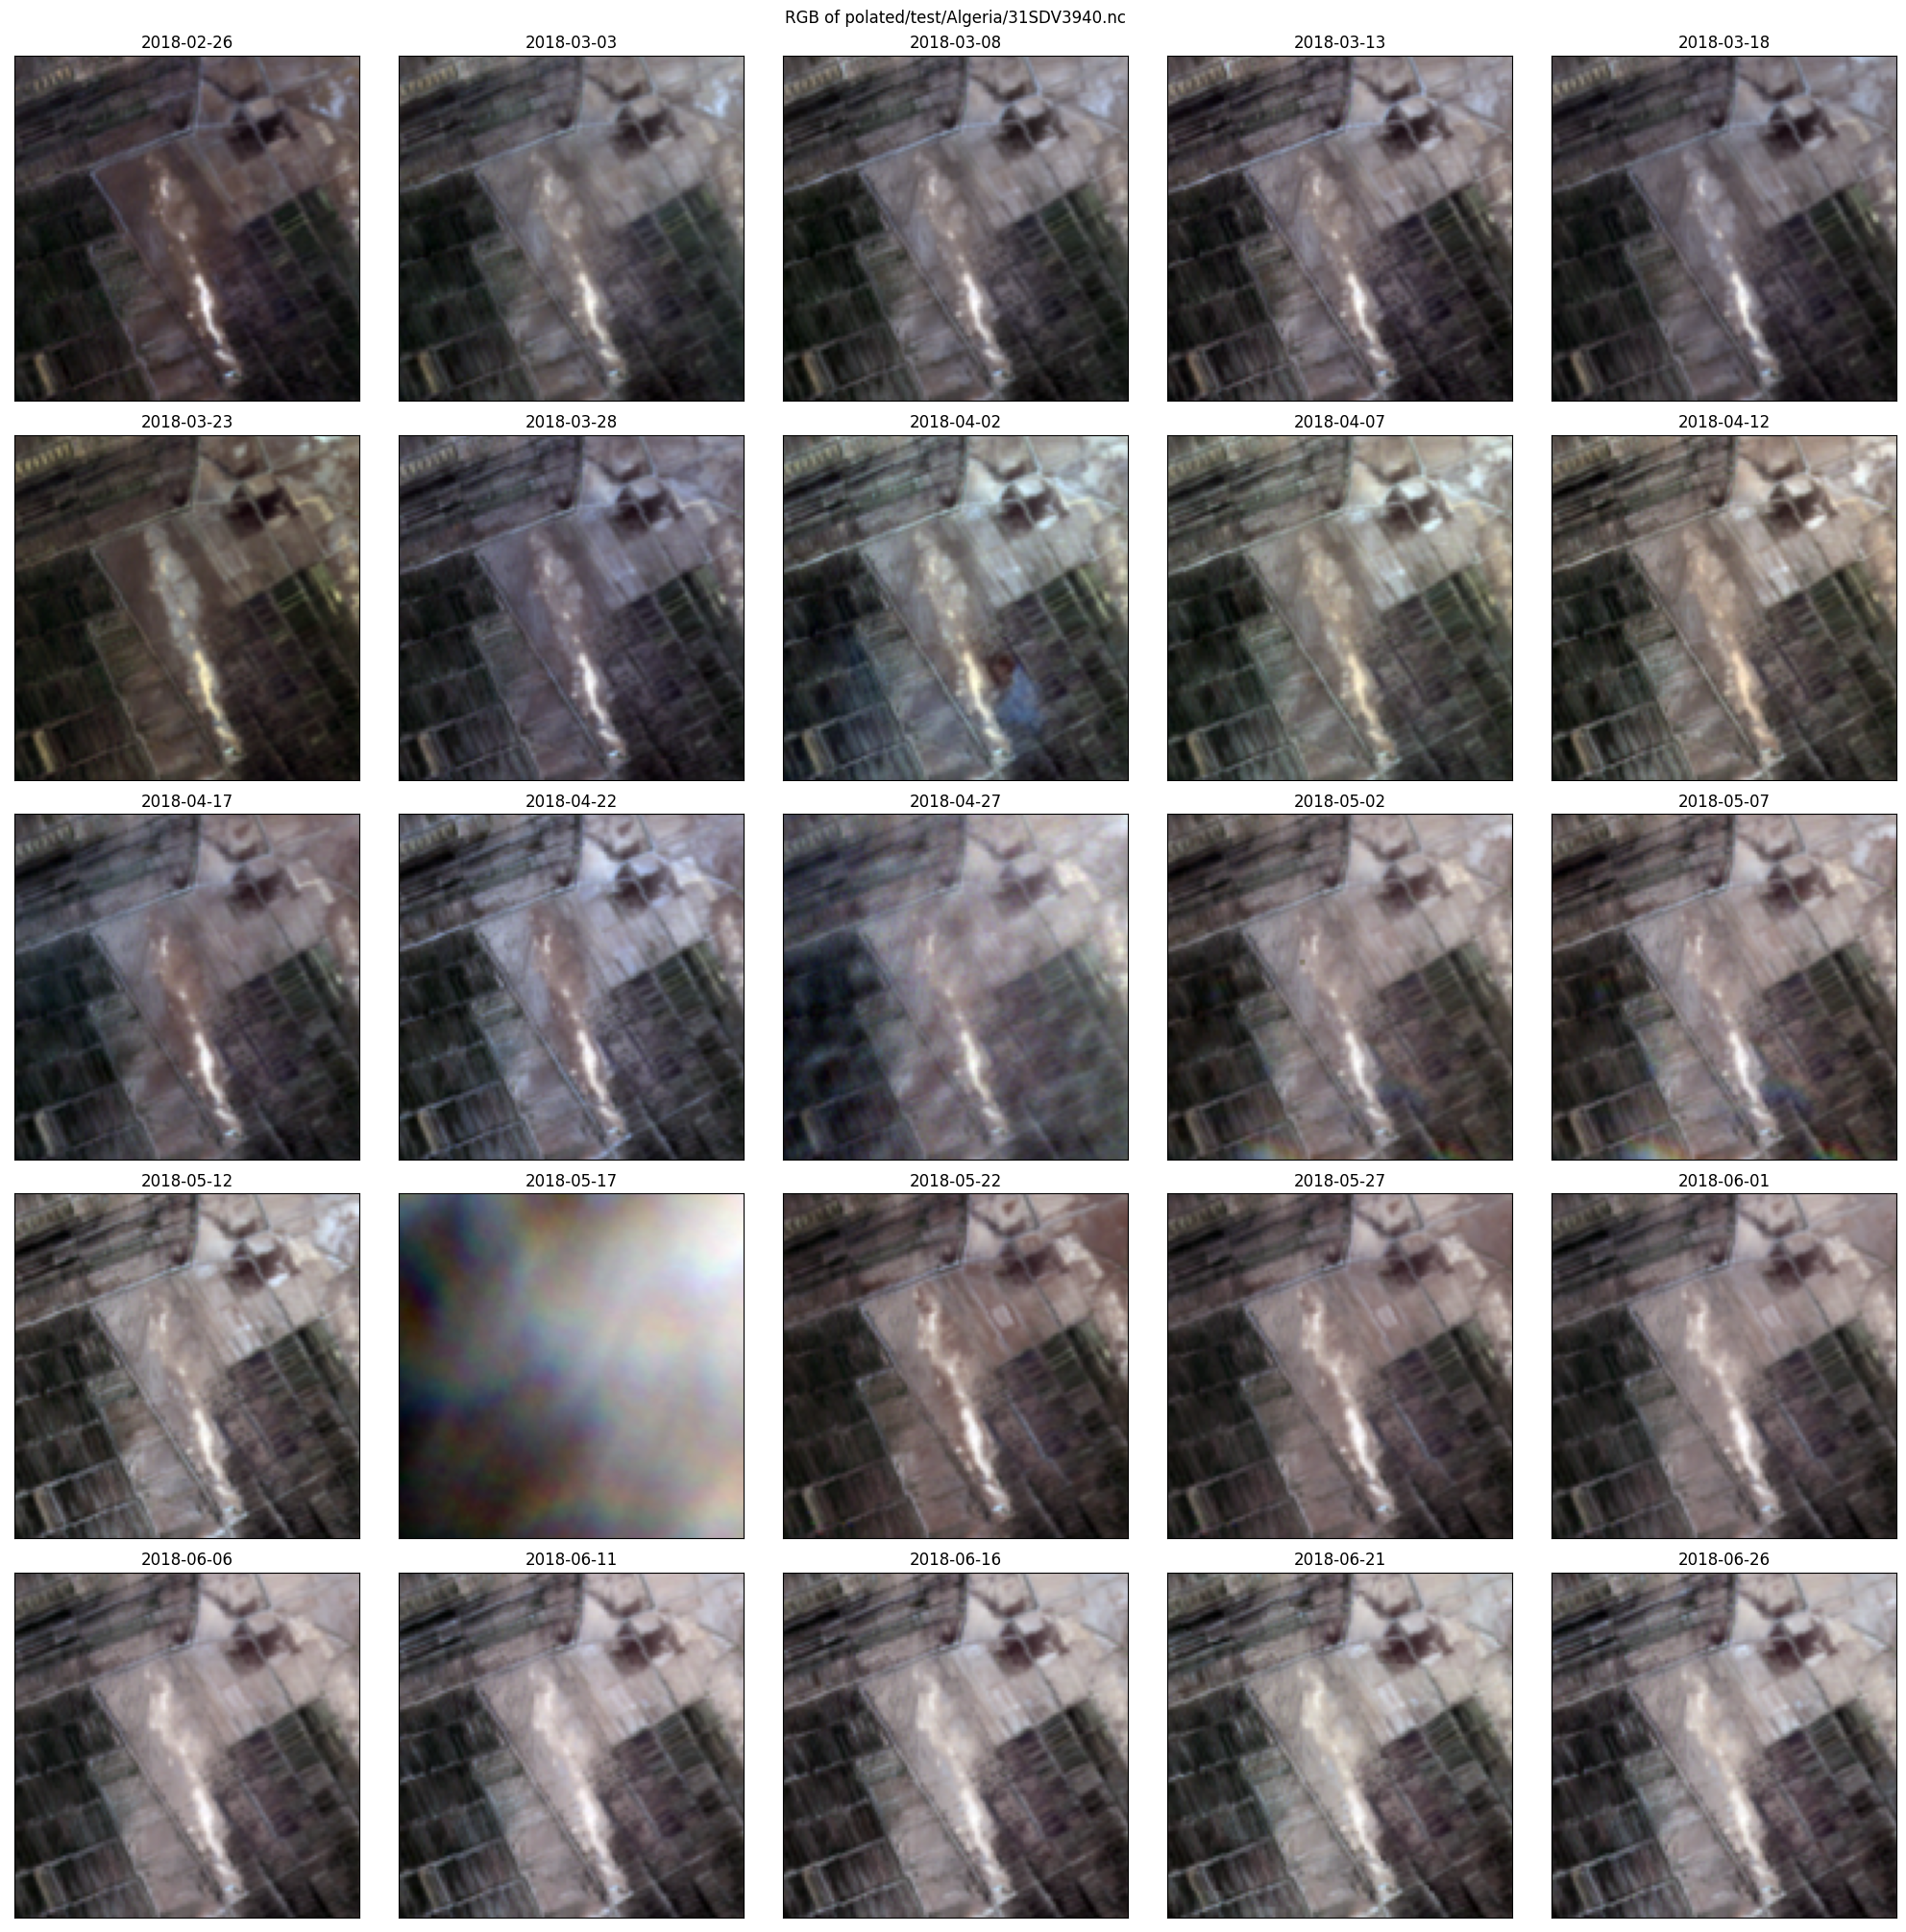

In [32]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

def brighten(band):
    alpha=1
    beta=0
    return np.clip(alpha*band+beta, 0,255)

file = "/Net/Groups/BGI/work_1/scratch/s3/earthnet/earthnet2023/test//Algeria/31SDV3940.nc" #"/scratch/crobin/earthnet2023_interpolated/test/Algeria/31SDV3940.nc"
minicube = minicube_test # xr.open_dataset(test_paths[0])
time = np.where(minicube.s2_avail.values == 1)[0]

fig, axes = plt.subplots(nrows=5, ncols=5, constrained_layout=True, figsize=(20, 20))
fig.suptitle("RGB of " + name)
t= 4
for i in range(5):
    for j in range(5):
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(minicube.isel(time=t).time.dt.date.values)

        red = brighten(normalize(minicube.isel(time=t).s2_B04))
        green = brighten(normalize(minicube.isel(time=t).s2_B03))
        blue = brighten(normalize(minicube.isel(time=t).s2_B02))

        rgb_composite= np.dstack((red, green, blue))
        axes[i,j].imshow(rgb_composite)
        t += 5


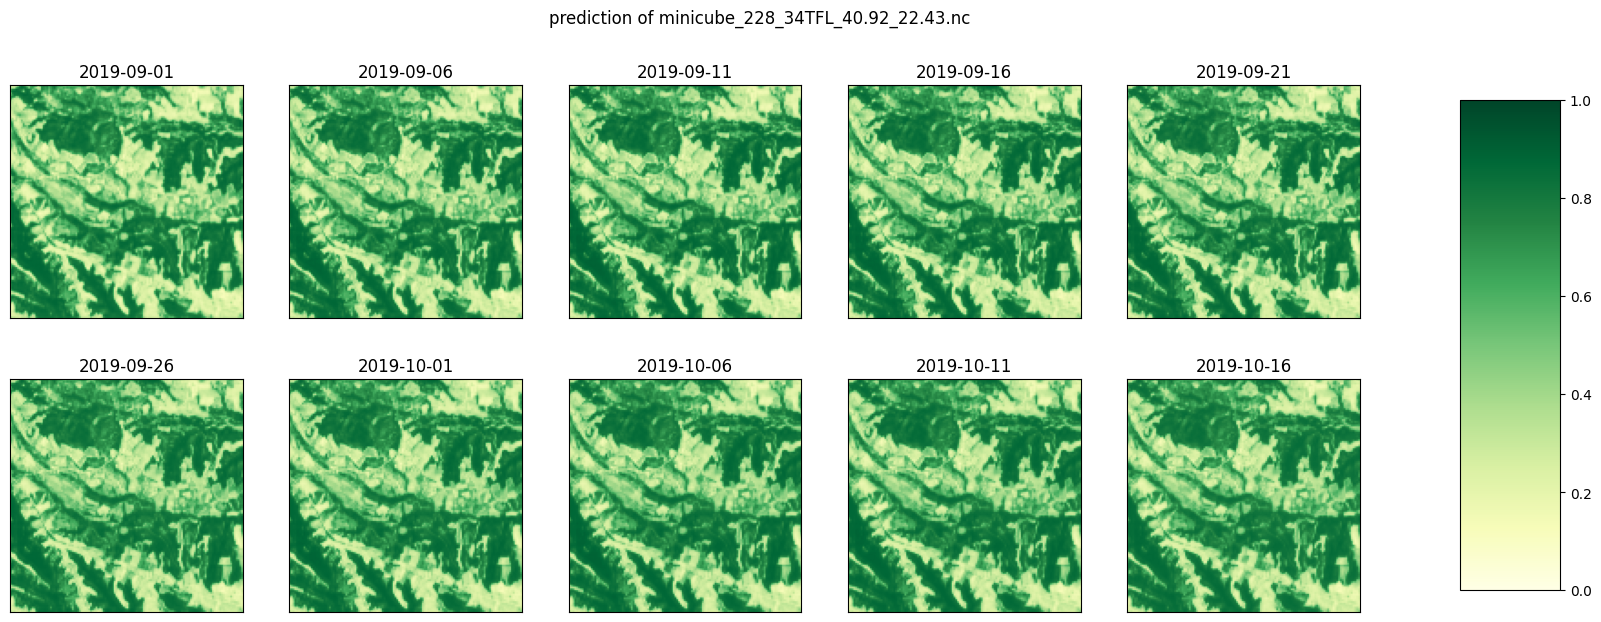

In [33]:
minicube = xr.open_dataset(pred_path)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 7))
fig.suptitle("prediction of " + name)
t= 0
for i in range(2):
    for j in range(5):
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(minicube.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(minicube.ndvi_pred.isel(time=t), cmap=cmap_veg, vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

IndexError: index 159 is out of bounds for axis 0 with size 150

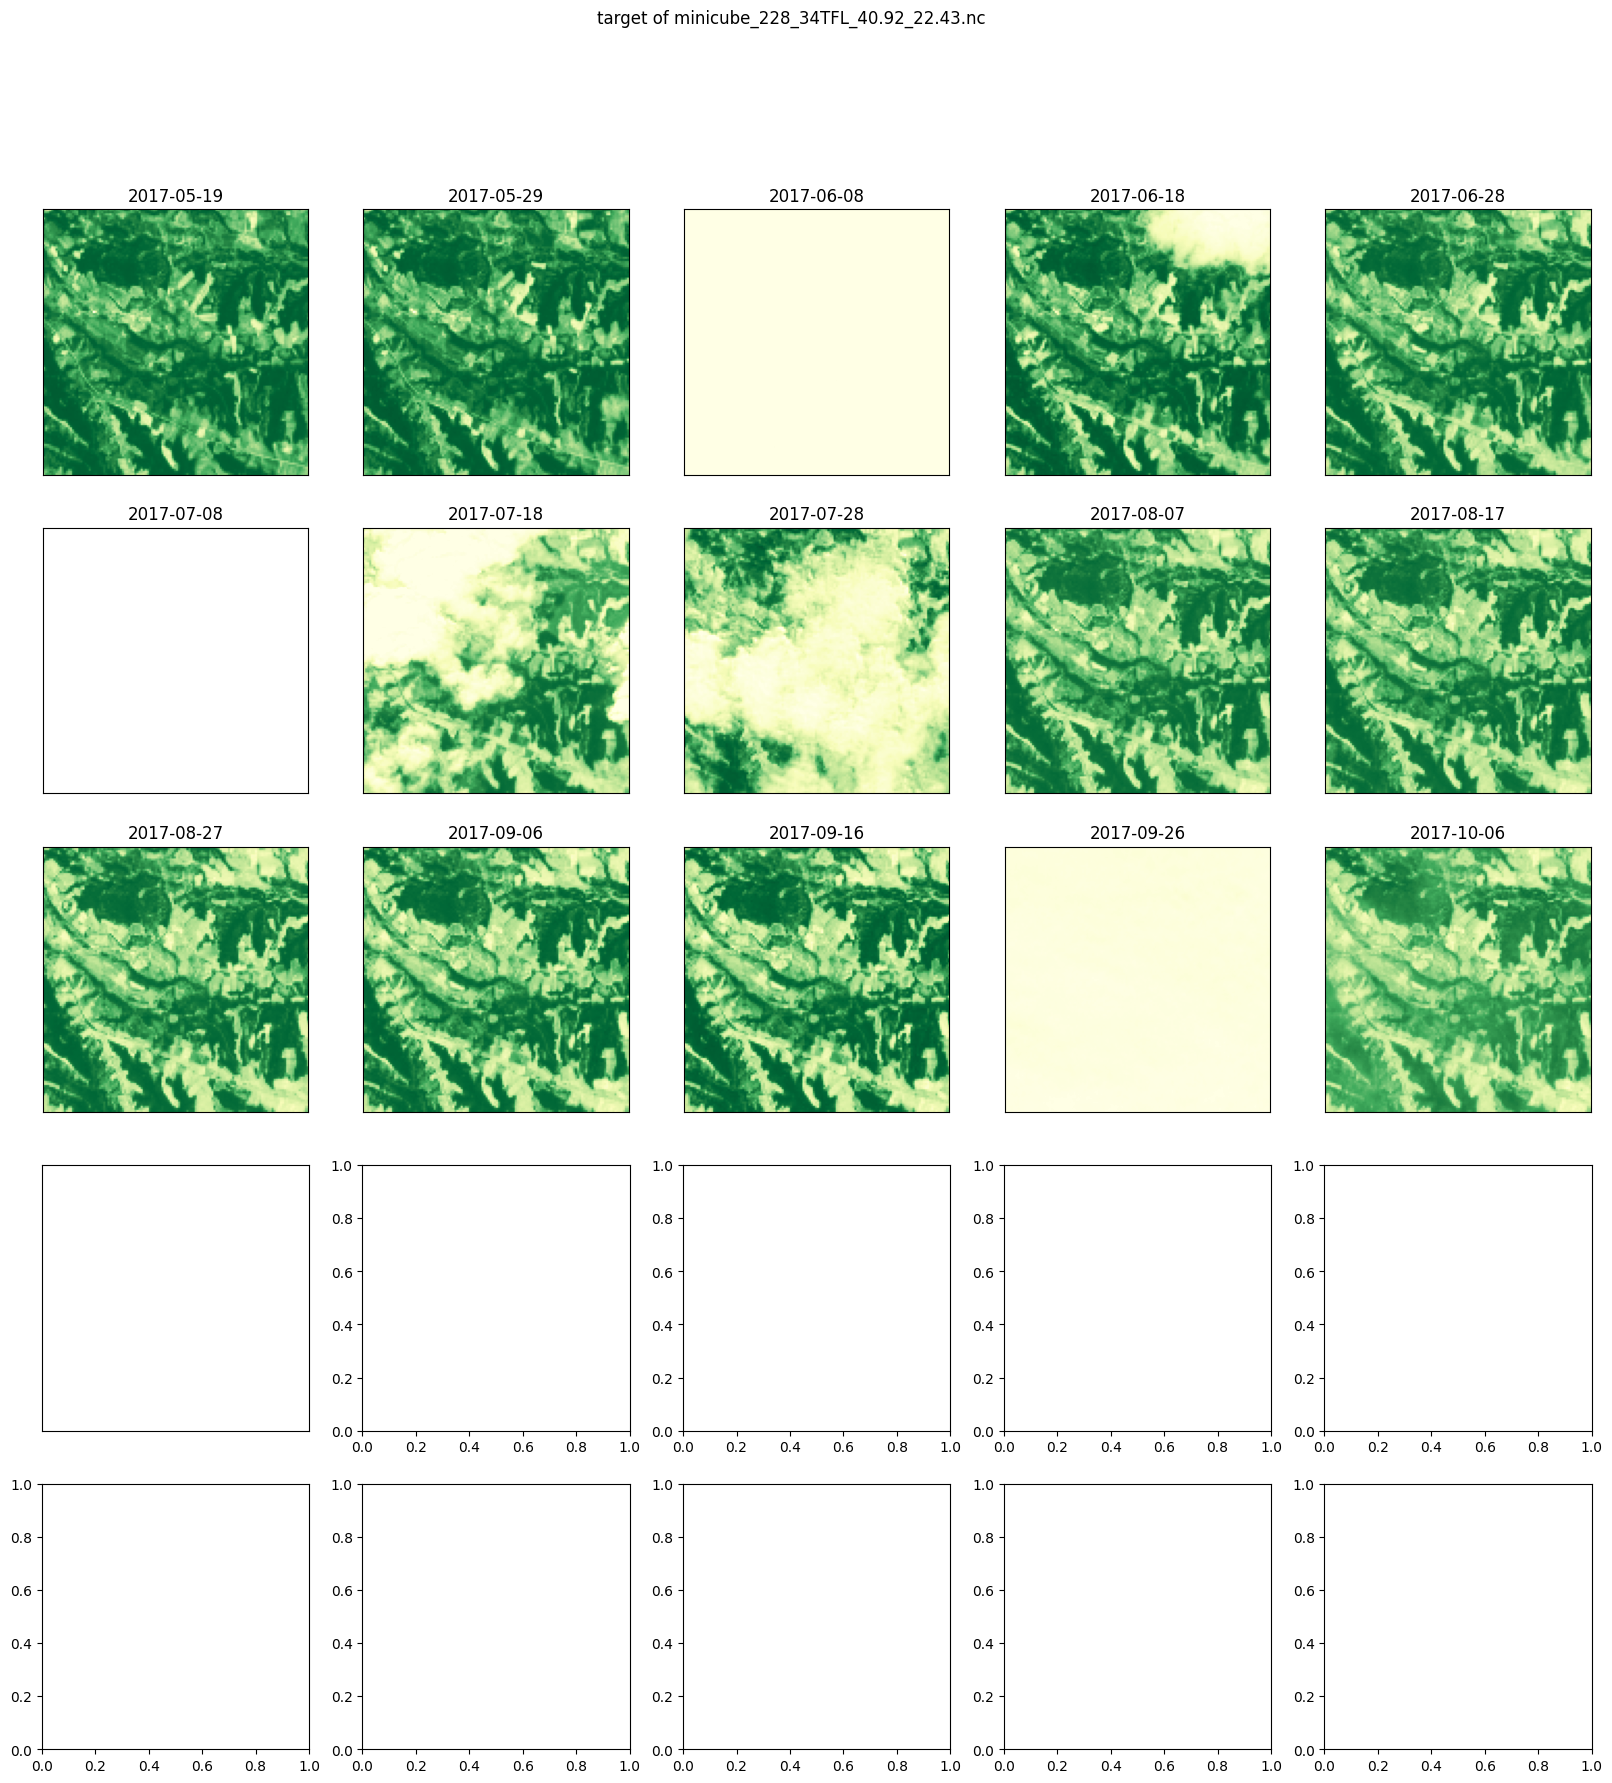

In [29]:
minicube = xr.open_dataset(test_path)
targ = (minicube.s2_B8A - minicube.s2_B04) / (
                minicube.s2_B8A + minicube.s2_B04 + 1e-6
            )

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
fig.suptitle("target of " + name)
t= 9
for i in range(5):
    for j in range(5):
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(minicube.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(targ.isel(time=t), cmap=cmap_veg, vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 10 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)